In [ ]:
from src.sampling.images import plot_frame_count_distributions

samples_root_dir = "data/samples"

plot_frame_count_distributions(samples_root_dir)

In [ ]:
from os.path import join
from numpy import concatenate

from src.common.helpers import read_dataframe
from src.hpe_dnn.helpers import df_to_dataset
from src.hpe_dnn.architecture import DnnArch
from src.common.model import ModelConstructorArgs
from src.hpe_dnn.model import HpeDnn, HpeDnnModelInitializeArgs

model = HpeDnn(args=ModelConstructorArgs(name="arch1"))

model.initialize_model(args=HpeDnnModelInitializeArgs(model = DnnArch.ARCH1))
df = read_dataframe(join("data", "df", model.dataset_name, "test.pkl"))
test = df_to_dataset(df)
labels = concatenate([y for _, y in test], axis=0)

predictions = model.model.predict(test)


loading the model 'arch1' from 'data/runs/hpe_dnn/arch1/train5/models/epoch_03__val_accuracy_0.7674.keras'


I0000 00:00:1754635907.400029   27590 service.cc:148] XLA service 0x7fdcec0386e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754635907.403538   27590 service.cc:156]   StreamExecutor device (0): NVIDIA TITAN RTX, Compute Capability 7.5
2025-08-08 08:51:47.677617: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1754635908.364318   27590 cuda_dnn.cc:529] Loaded cuDNN version 90300


12/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1754635911.236056   27590 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step


In [ ]:
from numpy import argmax
import tensorflow as tf


pred_idx = argmax(predictions, axis=1)
label_idx = argmax(labels, axis=1)

cm = tf.math.confusion_matrix(labels=label_idx, predictions=pred_idx)


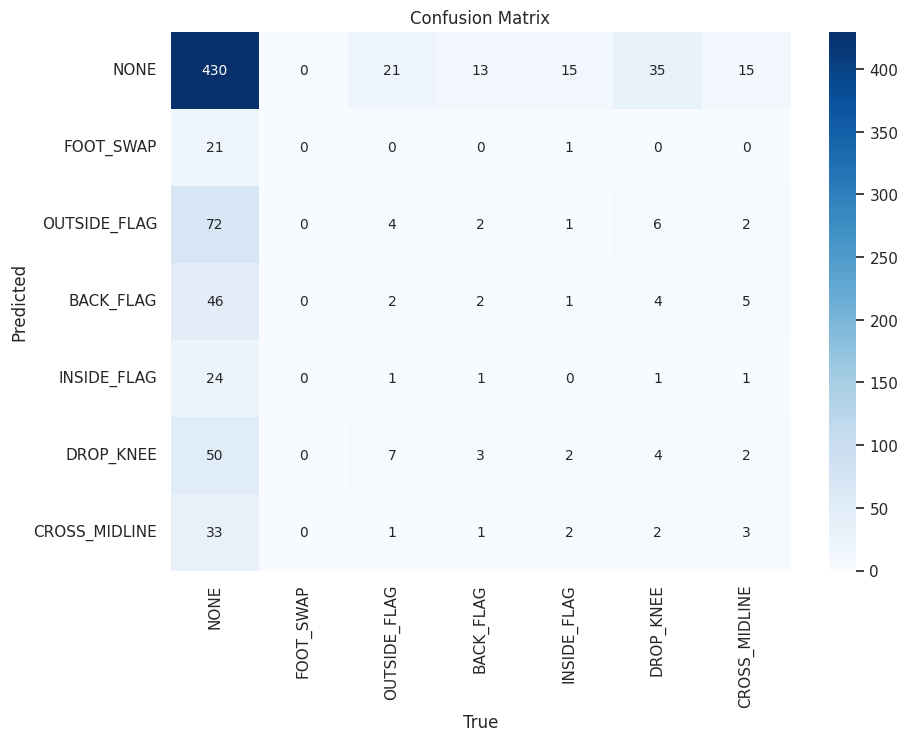

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
from pandas import DataFrame
from numpy import transpose

from src.labels import Technique

techniques = ["NONE", "FOOT_SWAP", "OUTSIDE_FLAG", "BACK_FLAG", "INSIDE_FLAG", "DROP_KNEE", "CROSS_MIDLINE"]
cm = transpose(cm)
df_cm = DataFrame(cm, index=techniques, columns=techniques)

plt.figure(figsize=(10, 7))
sn.heatmap(df_cm, annot=True, cmap="Blues", annot_kws={"size": 10}, fmt="g")

plt.title("Confusion Matrix")
plt.xlabel("True")
plt.ylabel("Predicted")

plt.show()

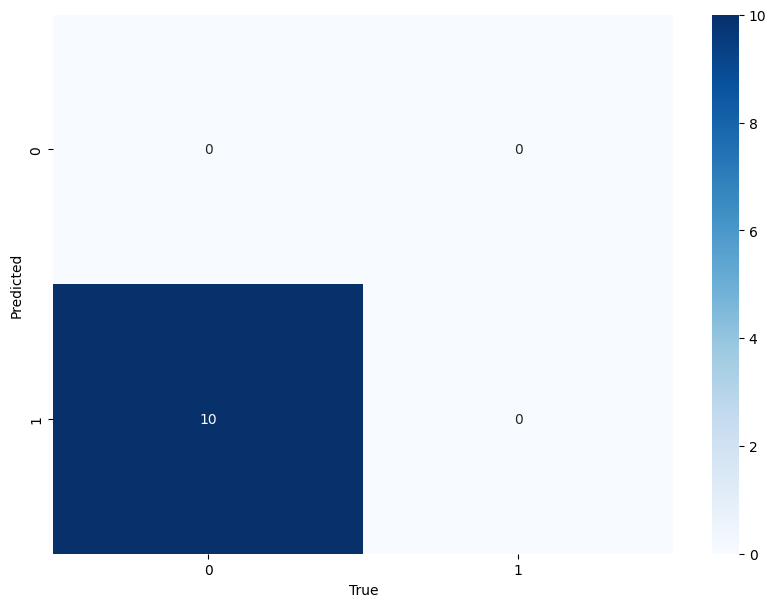

In [23]:
import numpy as np
from pandas import DataFrame


labels = np.zeros(10)
predictions = np.ones(10)

test_cm = tf.math.confusion_matrix(labels=labels, predictions=predictions)
test_cm = np.transpose(test_cm)
test_cm_df = DataFrame(test_cm, index=[0, 1], columns=[0, 1])

fig = plt.figure(figsize=(10, 7))

sn.heatmap(test_cm_df, annot=True, cmap="Blues")

plt.xlabel("True")
plt.ylabel("Predicted")

plt.show()

# Sota K-Fold cross validation

In [ ]:
%matplotlib inline

from src.common.model import ModelConstructorArgs
from src.sota.model import SOTAModelInitializeArgs, SOTAMultiRunTrainArgs, SOTATrainArgs
from src.sota.kfold import SOTAFoldCrossValidation

cross_validation = SOTAFoldCrossValidation(
    model_args = ModelConstructorArgs(name="yolo11m-cls-kf"),
    train_run_args = SOTAMultiRunTrainArgs(
        runs=1,
        model_initialize_args=SOTAModelInitializeArgs(model="yolo11m-cls"),
        train_args=SOTATrainArgs(epochs=1, balanced=False)
    )
)

cross_validation.train_folds()

In [ ]:

cross_validation = SOTAFoldCrossValidation(
    model_args = ModelConstructorArgs(name="yolo11n-cls-kf"),
    train_run_args = SOTAMultiRunTrainArgs(
        runs=1,
        model_initialize_args=SOTAModelInitializeArgs(),
        train_args=SOTATrainArgs(epochs=1, balanced=False)
    )
)

cross_validation.train_folds()

# HPE DNN K-Fold cross validation

In [ ]:
%matplotlib inline

from src.hpe_dnn.architecture import DnnArch
from src.hpe_dnn.model import HpeDnnModelInitializeArgs, HpeDnnMultiRunTrainArgs, HpeDnnTrainArgs
from src.common.model import ModelConstructorArgs
from src.hpe_dnn.kfold import HpeDnnFoldCrossValidation

In [ ]:
cross_validation = HpeDnnFoldCrossValidation(
    model_args=ModelConstructorArgs(name="arch1-kf"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        runs=10,
        model_initialize_args=HpeDnnModelInitializeArgs(model=DnnArch.ARCH1),
        train_args=HpeDnnTrainArgs(epochs=10, balanced=True, augment=True)
    ))

cross_validation.train_folds()

In [ ]:
cross_validation = HpeDnnFoldCrossValidation(
    model_args=ModelConstructorArgs(name="arch2-kf"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        runs=10,
        model_initialize_args=HpeDnnModelInitializeArgs(model=DnnArch.ARCH2),
        train_args=HpeDnnTrainArgs(epochs=10, balanced=True, augment=True)
    ))

cross_validation.train_folds()

## Sota model training 

In [ ]:
from src.sota.model import SOTA

sota = SOTA("data", "yolo11m-cls")
sota.execute_train_runs(model="yolo11m-cls", runs=3, epochs=10, balanced=False)
#sota.train_model(optimizer="AdamW", lr0=0.0005)

#metrics = model.val(data="data/img/techniques/val")

In [ ]:
from src.sota.model import SOTA

sota = SOTA("data", "yolo11n-cls")
sota.execute_train_runs(model="yolo11n-cls", runs=5, epochs=10, balanced=False)

In [ ]:
from src.sota.model import SOTA

sota = SOTA("data", "yolo11m-cls-balanced")
sota.execute_train_runs(model="yolo11m-cls", runs=5, epochs=10, balanced=True)

In [ ]:
from src.sota.model import SOTA

sota = SOTA("data", "yolo11n-cls-full-balanced")
sota.execute_train_runs(model="yolo11n-cls", runs=2, epochs=5, balanced=True)

In [ ]:
from src.sota.model import SOTA

sota = SOTA("data", "yolo11m-balance-50-155", dataset_name="techniques_balanced")
sota.initialize_model("yolo11m-cls")
sota.train_model()

In [ ]:
from src.sota.model import SOTA

sota = SOTA("data", "yolo11n-balance-50-155", dataset_name="techniques_balanced")
sota.initialize_model("yolo11n-cls")
#sota.train_model()
sota.test_model()

# Sota model testing

In [ ]:
from src.sota.model import SOTA

sota = SOTA("data", "yolo11m-cls")
metrics = sota.test_model(write_to_wandb=False)

print(metrics)

In [ ]:
metrics.top1

## HPE DNN model training

In [ ]:
from src.hpe_dnn.model import HpeDnn

hpednn = HpeDnn("data", "arch1")
hpednn.execute_train_runs(runs=5, epochs=10, augment=True)

In [ ]:
from src.hpe_dnn.model import HpeDnn

hpednn = HpeDnn("data", "arch1-balanced")
hpednn.execute_train_runs(runs=5, epochs=10, augment=True, balanced=True)

In [ ]:
%load_ext tensorboard

from src.hpe_dnn.model import HpeDnn

hpednn = HpeDnn("data", "arch1_balanced", "techniques_balanced")
hpednn.initialize_model()
hpednn.train_model()

In [ ]:
from os.path import join
run_dir = join("data", "sota", "yolo11n-cls-full-balanced")
run_dir

In [ ]:
from src.hpe_dnn.model import HpeDnn

hpednn = HpeDnn("data", "arch1_balanced_augmented", "techniques_balanced")
hpednn.initialize_model()
hpednn.train_model(augment=True)

In [ ]:
from src.hpe_dnn.model import HpeDnn, DnnArch

hpednn = HpeDnn("data", "arch2_balanced", "techniques_balanced")
hpednn.initialize_model(DnnArch.ARCH2)
hpednn.train_model()

In [ ]:
from src.hpe_dnn.model import HpeDnn, DnnArch

hpednn = HpeDnn("data", "arch3_balanced", "techniques_balanced")
hpednn.initialize_model(DnnArch.ARCH3)
hpednn.train_model()

In [ ]:
from src.hpe_dnn.model import HpeDnn

hpednn = HpeDnn("data", "arch1_full_balanced")
hpednn.execute_train_runs(runs=2, epochs=10, augment=True, balanced=True)

In [ ]:
from src.hpe_dnn.model import HpeDnn, DnnArch

hpednn = HpeDnn("data", "arch1_balanced_not_norm", "techniques_balanced")
hpednn.initialize_model(DnnArch.ARCH1, normalize=False)
hpednn.train_model()

In [ ]:
from src.hpe_dnn.model import HpeDnn, DnnArch

hpednn = HpeDnn("data", "arch1_balanced_dr_0.3", "techniques_balanced")
hpednn.initialize_model(DnnArch.ARCH1, dropout_rate=0.3)
hpednn.train_model()

In [ ]:
%tensorboard --logdir data/runs/hpe_dnn/arch1_balanced/train1/logs/train

In [ ]:
from src.hpe_dnn.model import read_data

df_path = "data/df/techniques/train.pkl"
train = read_data(df_path)